# **IMPORTING THE LIBRARIES**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **LOADING THE DATASET**

In [10]:
df=pd.read_csv("olympics_dataset.csv")
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


# **BASIC DATA INSPECTION**

In [62]:
df.shape

(252565, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [66]:
df.isna().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [68]:
df.drop_duplicates()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [70]:
df['Season'].unique()

array(['Summer'], dtype=object)

In [72]:
df.drop(['Season'],axis=1,inplace=True)

In [74]:
df.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

# **WHICH SPORT WAS THE MOST PLAYED?**

C:\Users\Tina Dahiya\AppData\Local\Temp\ipykernel_3908\2482023649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_PlayedSport,orient='h',palette='rainbow')


Text(0.5, 1.0, 'Top 10 Most Played Sports')

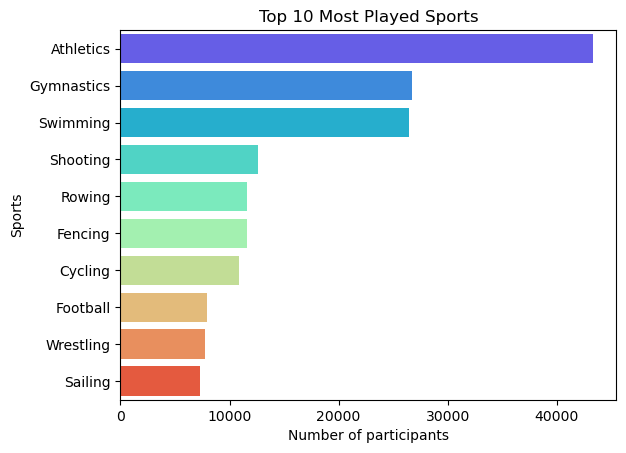

In [76]:
most_PlayedSport= df['Sport'].value_counts().head(10)
sns.barplot(data=most_PlayedSport,orient='h',palette='rainbow')
plt.xlabel('Number of participants')
plt.ylabel('Sports')
plt.title('Top 10 Most Played Sports')

# **WHAT WERE THE DIFFERENCES IN GROWTH TREND OF GYMNASTICS AND SWIMMING?**

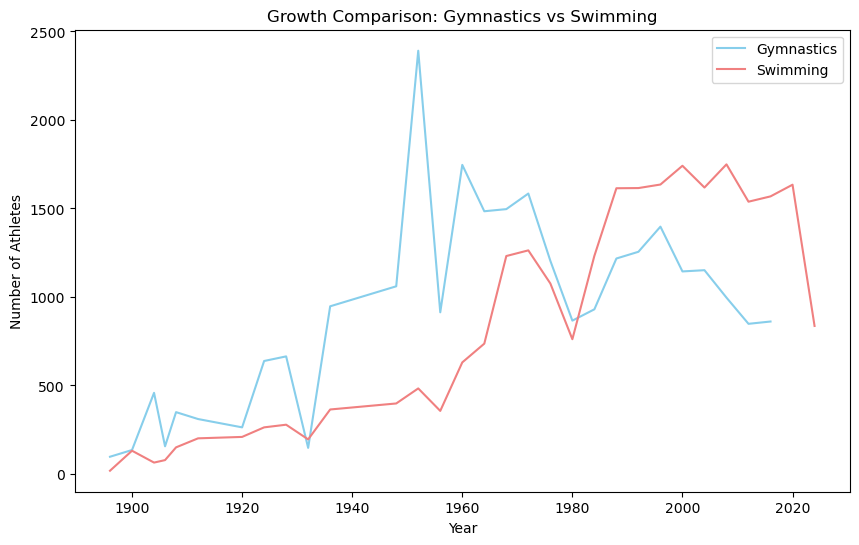

In [78]:
gym=df[df['Sport']=='Gymnastics']
swim=df[df['Sport']=='Swimming']

gym_growth = gym.groupby('Year')['player_id'].nunique()
swim_growth = swim.groupby('Year')['player_id'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(gym_growth.index, gym_growth.values, label='Gymnastics', color='skyblue')
plt.plot(swim_growth.index, swim_growth.values, label='Swimming', color='lightcoral')

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Growth Comparison: Gymnastics vs Swimming')
plt.legend()
plt.show()

# **WHAT WERE THE TOP 10 TEAMS WITH MOST NUMBER OF PARTICIPANTS?**

C:\Users\Tina Dahiya\AppData\Local\Temp\ipykernel_3908\1728762122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_Team,orient='h',palette='viridis')


Text(0.5, 1.0, 'Top 10 Teams with most number of participants')

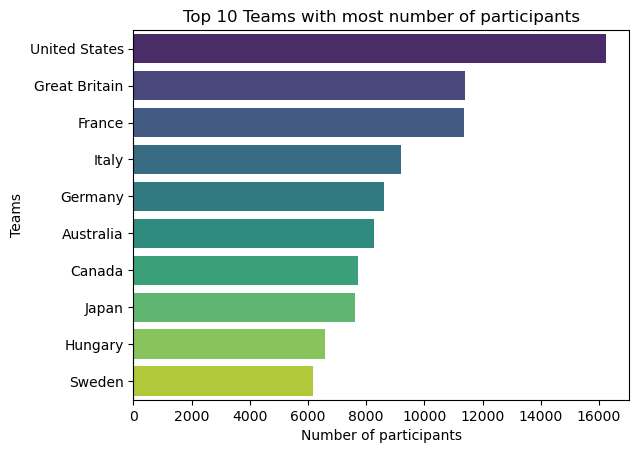

In [80]:
Top_Team= df['Team'].value_counts().head(10)
sns.barplot(data=Top_Team,orient='h',palette='viridis')
plt.xlabel('Number of participants')
plt.ylabel('Teams')
plt.title('Top 10 Teams with most number of participants')

# **ANALYSIS ON BASIS OF SEX**

In [83]:
gender=df[['Year','Sex','player_id']]
gender.drop_duplicates()

,Year,Sex,player_id
0,1992,M,0
1,2012,M,1
2,1920,M,2
3,1900,M,3
4,1932,F,26
...,...,...,...
252560,2024,F,4986655
252561,2024,F,9460001
252562,2024,M,1972077
252563,2024,M,1899865


In [85]:
participation=gender.groupby(['Year','Sex']).count().reset_index()
participation

,Year,Sex,player_id
0,1896,M,380
1,1900,F,33
2,1900,M,1903
3,1904,F,16
4,1904,M,1285
...,...,...,...
56,2016,M,7465
57,2020,F,7266
58,2020,M,7855
59,2024,F,7312


# **HOW MANY MALES AND FEMALES PARTICIPATED IN OLYMICS EVERY YEAR?**

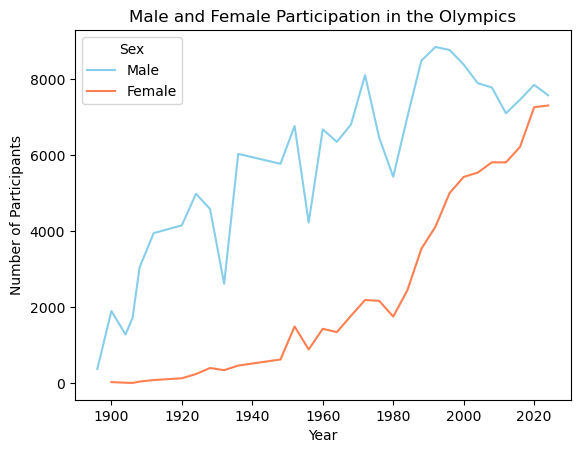

Number of Gender-wise participants each year
     Year Sex  player_id
0   1896   M        380
1   1900   F         33
2   1900   M       1903
3   1904   F         16
4   1904   M       1285
..   ...  ..        ...
56  2016   M       7465
57  2020   F       7266
58  2020   M       7855
59  2024   F       7312
60  2024   M       7580

[61 rows x 3 columns]


In [87]:
male_data = participation[participation['Sex'] == 'M']
plt.plot(male_data['Year'], male_data['player_id'], label='Male', color='skyblue')

female_data = participation[participation['Sex'] == 'F']
plt.plot(female_data['Year'], female_data['player_id'], label='Female', color='coral')

plt.title('Male and Female Participation in the Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Sex')
plt.show()

print("Number of Gender-wise participants each year\n", participation)



# **WHAT WERE THE NUMBER OF MEDALS WON BY MALES AND FEMALES IN EACH YEAR?**

In [13]:
accep_medals=df[df['Medal']!='No medal']
medalCount_gender=accep_medals.groupby(['Year','Sex']).size().reset_index(name='Number of Medals')
medalCount_gender

,Year,Sex,Number of Medals
0,1896,M,143
1,1900,F,13
2,1900,M,591
3,1904,F,10
4,1904,M,476
...,...,...,...
56,2016,M,1054
57,2020,F,1208
58,2020,M,1241
59,2024,F,1147


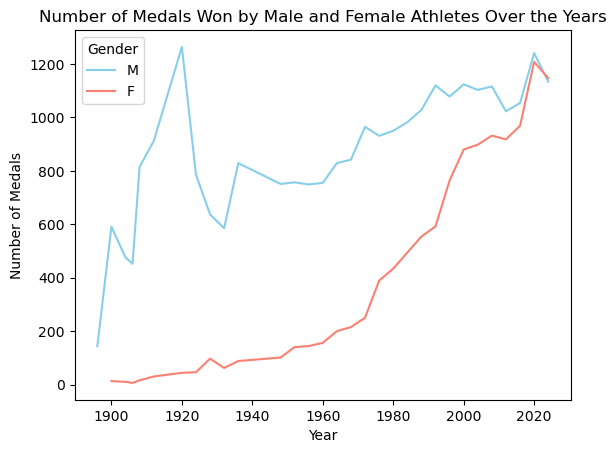

In [19]:
sns.lineplot(data=medalCount_gender, x='Year', y='Number of Medals', hue='Sex', palette={'M': 'skyblue', 'F': 'salmon'})
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by Male and Female Athletes Over the Years')
plt.legend(title='Gender')
plt.show()


# **HOW DO THE TOP 5 TEAMS COMPARE IN TERMS OF MEDAL COUNTS ACROSS DIFFERENT SEX?**

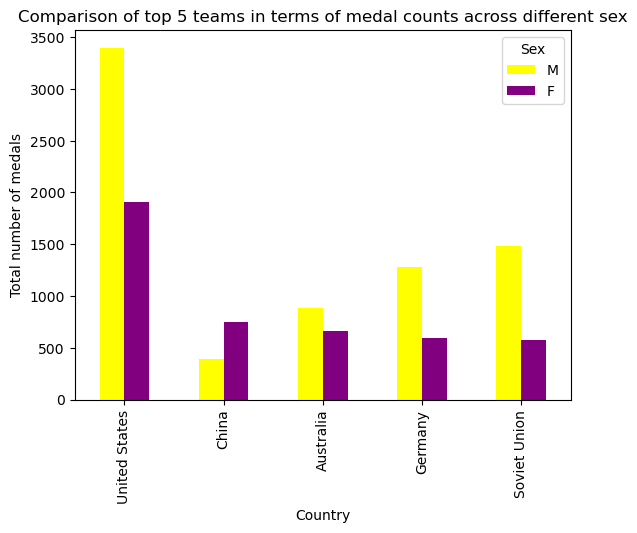

In [37]:
med_count=accep_medals.groupby(['Team','Sex']).size().unstack(fill_value=0).sort_values(by=['F','M'],ascending=False).head(5)
med_count[['M','F']].plot(kind='bar',stacked=False,color=['Yellow','Purple'])
plt.xlabel('Country')
plt.ylabel('Total number of medals')
plt.title('Comparison of top 5 teams in terms of medal counts across different sex')
plt.show()

# **WHAT WERE THE NUMBER OF MEDALS EARNED BY TOP 10 TEAMS?**

In [42]:
Country_Medal=accep_medals.groupby(['NOC','Medal']).size().unstack(fill_value=0).sort_values(by=['Gold','Silver','Bronze'], ascending=False)
top_countries=Country_Medal.head(10)
top_countries

Medal,Bronze,Gold,Silver
NOC,,,
USA,1366,2716,1539
URS,596,832,635
GBR,753,716,813
GER,721,634,613
FRA,660,583,712
ITA,516,571,517
CHN,331,464,423
HUN,407,450,347
AUS,621,411,524


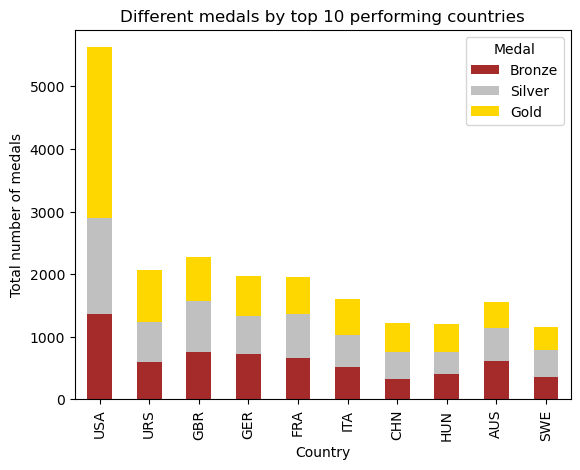

In [44]:
top_countries[['Bronze','Silver','Gold']].plot(kind='bar',stacked=True,color=['brown','silver','gold'])
plt.xlabel('Country')
plt.ylabel('Total number of medals')
plt.title('Different medals by top 10 performing countries')
plt.show()

# **WHO WERE TO 10 PLAYERS WITH MOST NUMBER OF MEDALS?**

In [93]:
top_PlayersCount=accep_medals.groupby('Name')['Medal'].size().reset_index(name='Medal_Count')
top_Players=top_PlayersCount.sort_values('Medal_Count', ascending=False).head(10)
top_Players

,Name,Medal_Count
17768,Michael Ii,28
14886,Larysa (diriy-),18
4008,Charles Jr.,16
19008,Nikolay Andrianov,15
3215,Borys Shakhlin,13
12565,John Jr.,13
23956,Takashi Ono,13
9045,Gustaf Carlberg,13
6003,Edoardo Mangiarotti,13
22155,Ryan Lochte,12


C:\Users\Tina Dahiya\AppData\Local\Temp\ipykernel_3908\1518206676.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_Players,x='Name',y='Medal_Count',palette='pastel')


Text(0.5, 1.0, 'Number of medals by top 10 acheivers')

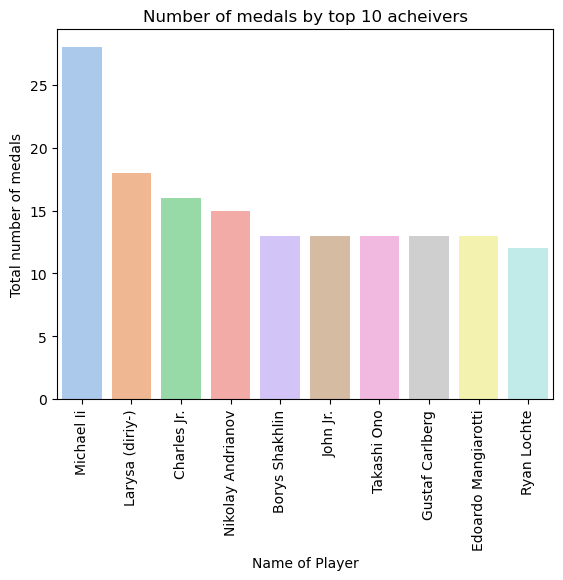

In [95]:
sns.barplot(top_Players,x='Name',y='Medal_Count',palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Name of Player')
plt.ylabel('Total number of medals')
plt.title('Number of medals by top 10 acheivers')